In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import random
df=pd.read_csv('Activacion.csv')


In [32]:
cambios=df[df['Tiempo']=='Order'].index.tolist()
print(cambios)

[185, 371, 557, 743, 929, 1115, 1301, 1487, 1673, 1859, 2045, 2231, 2417, 2603, 2789, 2975, 3161, 3347, 3533, 3719, 3905, 4091, 4277, 4463, 4649, 4835, 5021, 5207, 5393, 5579, 5765, 5951, 6137, 6323, 6509, 6695, 6881, 7067, 7253, 7439, 7625, 7811]


In [33]:
rnd1,rnd2=random.choices(cambios,k=2)

Dividimos 

In [34]:
gesto1=df[(df.index>=rnd1-185)&(df.index<rnd1)].astype(int)
gesto2=df[(df.index>=rnd2-185)&(df.index<rnd2)].astype(int)


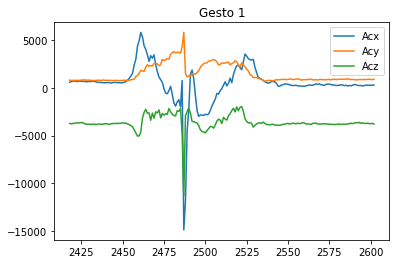

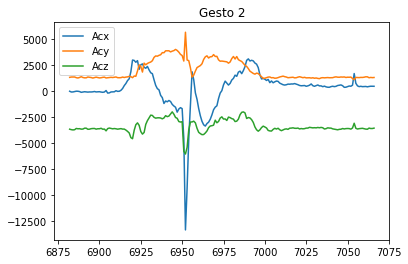

In [35]:
gesto1[['Acx','Acy','Acz']].plot(title='Gesto 1')
gesto2[['Acx','Acy','Acz']].plot(title='Gesto 2')

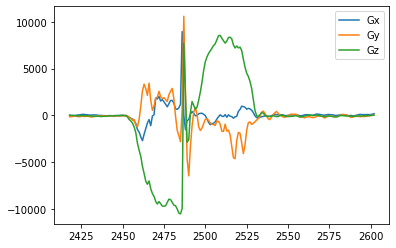

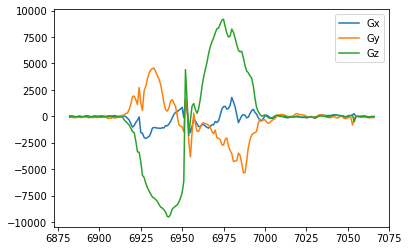

In [36]:
gesto1[['Gx','Gy','Gz']].plot()
gesto2[['Gx','Gy','Gz']].plot()